# EEG VISUALIZATION

### This notebook is a tool for exploring the data files from the Active Visual Oddball P3 experiment.  
#### The goal of this exercise is to understand the components and structure of a typical EEG data file.  


## Target Detection Experiment 

### These data were extracted from the ERP CORE (https://osf.io/thsqg/wiki/home/).  

### These are data from the experiment, **Active Visual Oddball P3**

### Some details of the experiment - 
*   The stimulus consists of the letters A, B, C, D, E
*   In any block, one of the 5 letters was designated the "target" with a response with one hand, while the others were designated "standards" with response with the other hand. 
*   The probability of any letter appearing is 0.2.  
*   The probability of a target appearing is 0.2 

#### Load modules that we need 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 


## Data Files 

### I provided example data files for this tutorial in a hdf5 format file.  Matlab users will know this as a .mat file.  
### There are native file formats in python called pickle, which are super convenient, but are not appropriate for sharing as they are insecure.    

In [2]:
data = loadmat('data/2_P3.mat')

### Loadmat will will load a datafile into a dictionary.  A **dictionary** is a data structure in python that allows us to keep related data (for example from one data collection) together.  

### To understand a dictionary contents, the best thing to do is to print out the **keys**.  

In [3]:
data.keys()

dict_keys(['blocktarget', 'channelnames', 'eeg', 'eeg_time', 'goodtrials', 'nchannels', 'ntrials', 'response', 'responsetime', 'samplingrate', 'stimulus', 'target'])

### I habitually copy out the elements of a dictionary into simple variables, to make my life easy.  This is not required, and may use up memory. 

### To track everything, I use the key names as my variable names

In [4]:
blocktarget = data['blocktarget']
channelnames = data['channelnames']
eeg = data['eeg']
eeg_time = data['eeg_time']
goodtrials = data['goodtrials']
nchannels = data['nchannels']
ntrials = data['ntrials']
response = data['response']
responsetime = data['responsetime']
samplingrate = data['samplingrate']
stimulus = data['stimulus']
target = data['target']

## README 

### The information about the datafiles in an experiment is normally placed in a README file. 
### For convenience I am going to place that information here instead.

###  This data was obtained from the archive ERP CORE and reorganized for this class. 
###  Each file contains the data of one participant, indicated in the filename. 
###  The variables contained here are 

*   `ntrials` - number of trials in the experiment 
*   `nchannels` - number of EEG channels 
*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `eeg_time` - the time relative to *stimulus onset* in each EEG observation.
*   `channelnames` - the name of the EEG channels indicating where it is located.    
*   `stimulus` - the stimulus presented on each good trial, 1 = A, 2 = B, 3 = C, 4 = D, 5 = E 
*   `target` - the target stimulus on each good trial 1 = A, 2 = B, 3 = C, 4 = D, 5 = E
*   `blocktarget` - indicates which trial had the target on each block, 1 if a target 0 if not a target. 
*   `response` - variable indicating the response accuracy 1 = correct, -1 = incorrect, 0 = no response,
*   `responsetime` - time after stimulus onset when the subject provided a response. 
*   `goodtrials` - vector with value 1 if the trial had a response, 0 if no response or multiple responses.   


### Lets convert the EEG to microvolts 

In [5]:
eeg = 10**6*eeg

### We can and should take a look at these variables manually before proceding 

### Stimulus and Target 

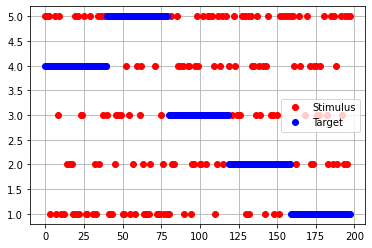

In [6]:
plt.plot(stimulus,'ro')
plt.plot(target,'bo')
plt.grid()
plt.legend(('Stimulus','Target'))
plt.show()

### Response 

In [7]:
[values, instances] = np.unique(response,return_counts = True)
print('Values are: ', values)
print('Occuring: ', instances)

Values are:  [1]
Occuring:  [198]


### Response Time 

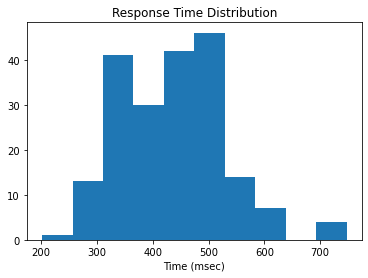

In [8]:
plt.hist(responsetime)
plt.title('Response Time Distribution')
plt.xlabel('Time (msec)')
plt.show()

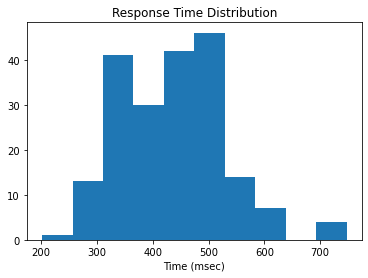

In [9]:
plt.hist(responsetime[goodtrials == 1])
plt.title('Response Time Distribution')
plt.xlabel('Time (msec)')
plt.show()

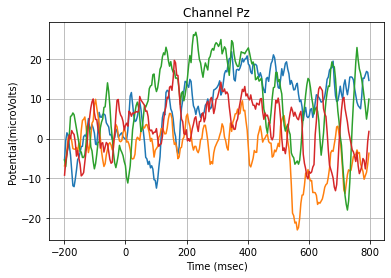

In [10]:
plt.plot(eeg_time,np.transpose(eeg[0:4,12,:]))
plt.title('Channel '+channelnames[12])
plt.xlabel('Time (msec)')
plt.ylabel('Potential(microVolts)')
plt.grid()
plt.show()

## EVENT RELATED POTENTIALS 
### Its just a **mean**

## TASK CONTRAST

### In analysis neural data there is usually a task contrast, or patient/control contrast I am really interested in.  

### So averaging all the data together doesnt really inform me of everything. 

### In this task, the critical thing we are looking for is the difference between a target and a standard. 

### A target trial would correspond to when the stimulus and the target objective were the same. 

### So I need to interest the two conditions in a compound logical statement.  

In [11]:
erp_target = np.mean(eeg[(goodtrials == 1)&(blocktarget > 0),:,:],axis =0)
erp_standard = np.mean(eeg[(goodtrials == 1)&(blocktarget == 0),:,:],axis =0)

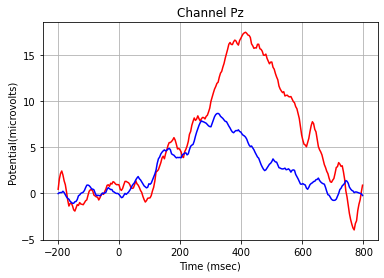

In [12]:
plt.plot(eeg_time,erp_target[12,:],'r')
plt.plot(eeg_time,erp_standard[12,:],'b')
plt.title('Channel '+channelnames[12])
plt.xlabel('Time (msec)')
plt.ylabel('Potential(microvolts)')
plt.grid()
plt.show()

In [13]:
## Lets take care of the random number genearator properly. 
rng = np.random.default_rng(1234)  # The seed can be changed to make a new randomization
###
target_index = np.where(blocktarget > 0)[0]  #notice i had to take the first item from the output to np.where.  This is because where returns it in a list. 
standard_index = np.where(blocktarget == 0)[0] 
rand_standards = rng.permutation(standard_index)
ntargets = len(target_index)
erp_target = np.mean(eeg[target_index],axis =0)
erp_standard = np.mean(eeg[rand_standards[0:ntargets],:],axis =0)


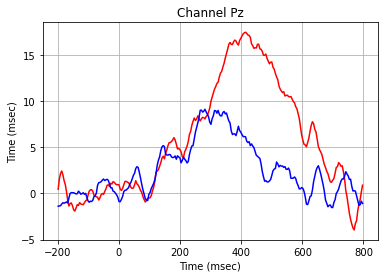

In [14]:
plt.plot(eeg_time,erp_target[12,:],'r')
plt.plot(eeg_time,erp_standard[12,:],'b')
plt.title('Channel '+channelnames[12])
plt.xlabel('Time (msec)')
plt.ylabel('Time (msec)')
plt.grid()
plt.show()

### ELECTRODE POSITIONS AND NAMES IN EEG 

#### EEG recordings are based on placing electrodes on the scalp. In order to standardize these posiions, the distances between channels are set at even intervals.    
#### The nomenclature of the electrode names has two parts.
#### The first part is the leading letter which can be: 
*   Fp - Prefrontal
*   AF - Anterior Frontal 
*   F - Frontal
*   C - Central 
*   P - Parietal
*   O - Occipital
*   T - Temporal 

These letters are sometimes blended together, e.g. PO, to indicate an electrode position between two regions of the head.   

![ELECTRODE POSITIONS](img/10-5_ALL.jpg)

#### The second part indicates the position of the electrode relative to the midline 
*   z - on the midline
*   1,3,5,7 from the midline moving laterally on the Left hemisphere 
*   2,4,6,8 from the midline moving laterally on the Right hemisphere 

![ELECTRODE POSITIONS](img/10-5_L.jpg)

![ELECTRODE POSITIONS](img/10-5_F.jpg)

![ELECTRODE POSITIONS](img/10-5_R.jpg)

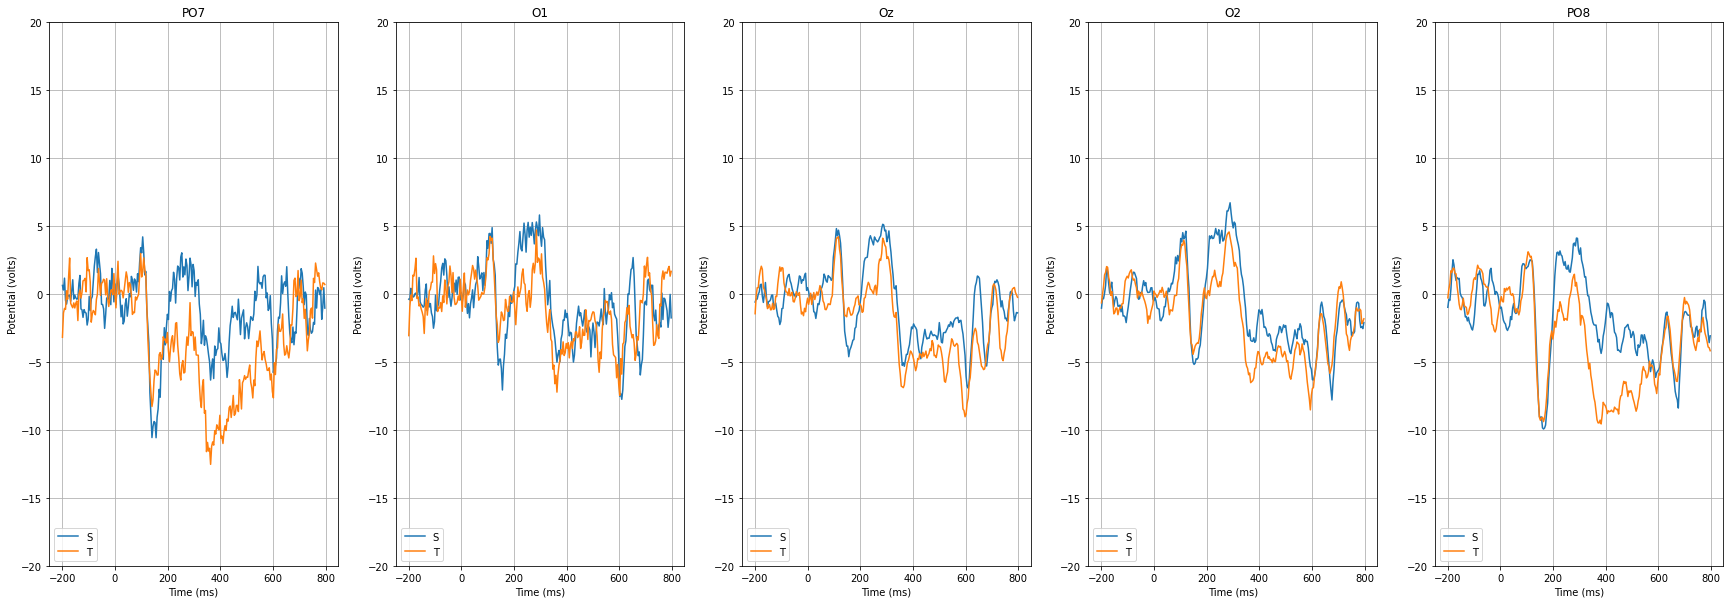

In [21]:
chans = [8,10,11,27,25] # I manually looked up the channel numbers. I made a 1 x 4  lay out for fun.  
fig,a = plt.subplots(1,5, figsize = (30,10))
labels = ['S','T']
for j in range(5):
    a[j].plot(eeg_time,erp_standard[chans[j],:])
    a[j].plot(eeg_time,erp_target[chans[j],:])
    a[j].set_ylim((-20,20))
    a[j].set_title(channelnames[chans[j]])
    a[j].legend(labels,loc='lower left')
    a[j].grid(True)
    a[j].set_xlabel('Time (ms)')
    a[j].set_ylabel('Potential (volts)')

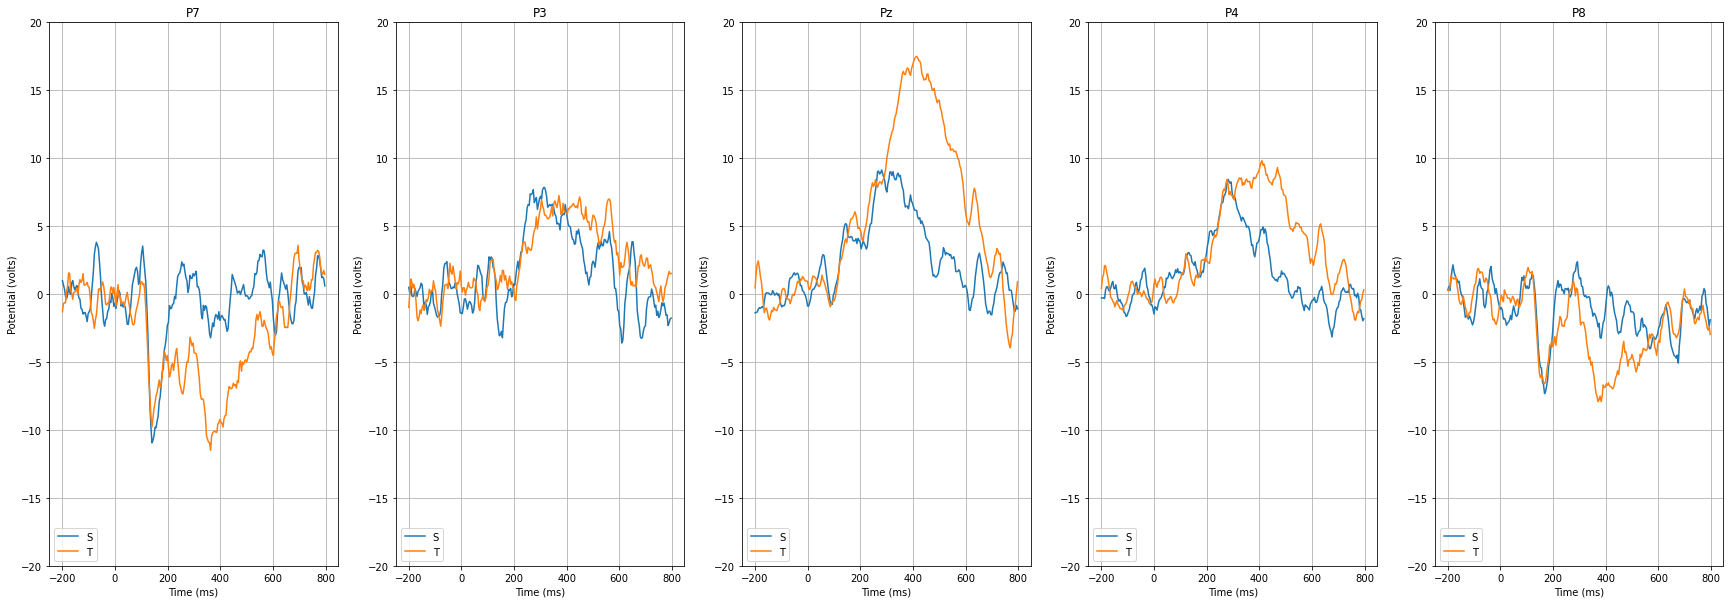

In [16]:
chans = [7,6,12,23,24] # I manually looked up the channel numbers. I made a 1 x 4  lay out for fun.  
fig,a = plt.subplots(1,5, figsize = (30,10))
labels = ['S','T']
for j in range(5):
    a[j].plot(eeg_time,erp_standard[chans[j],:])
    a[j].plot(eeg_time,erp_target[chans[j],:])
    a[j].set_ylim((-20,20))
    a[j].set_title(channelnames[chans[j]])
    a[j].legend(labels,loc='lower left')
    a[j].grid(True)
    a[j].set_xlabel('Time (ms)')
    a[j].set_ylabel('Potential (volts)')

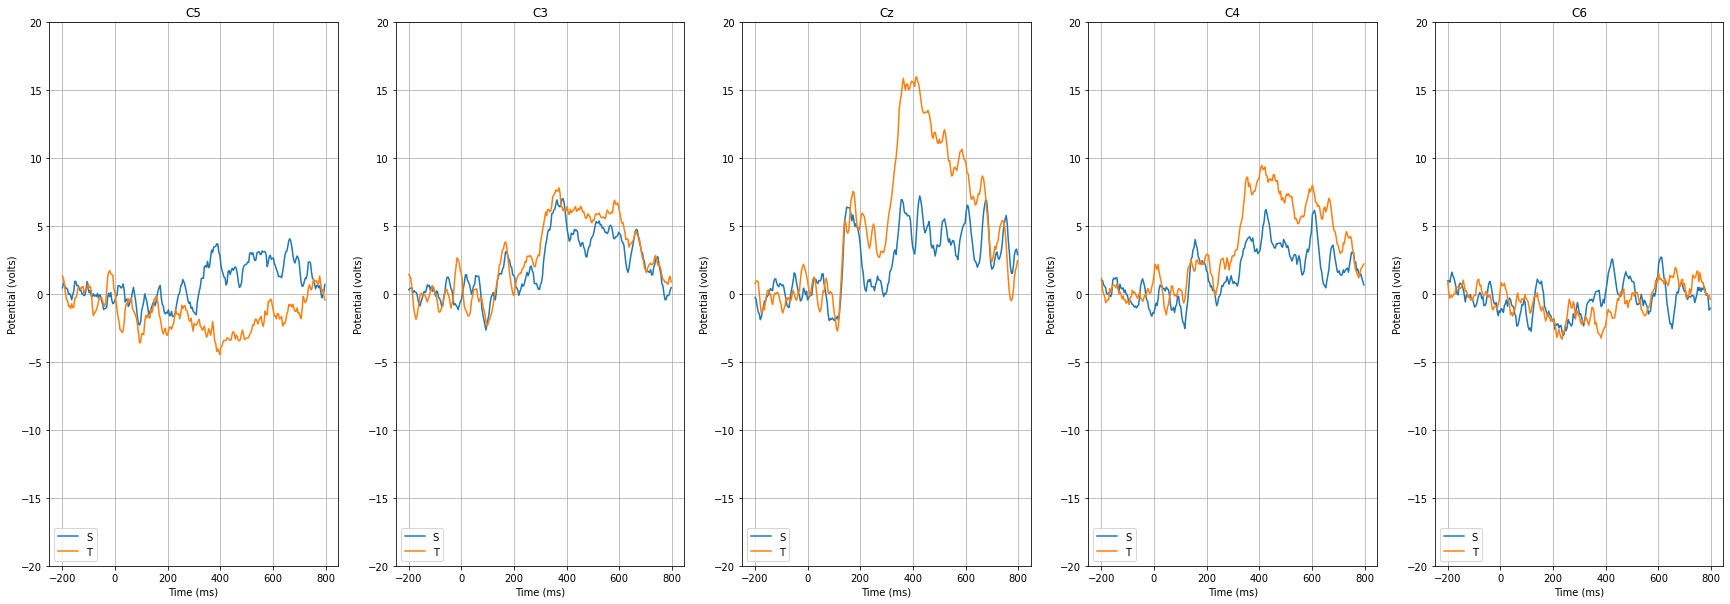

In [20]:
chans = [5,4,20,21,22] # I manually looked up the channel numbers. I made a 1 x 4  lay out for fun.  
fig,a = plt.subplots(1,5, figsize = (30,10))
labels = ['S','T']
for j in range(5):
    a[j].plot(eeg_time,erp_standard[chans[j],:])
    a[j].plot(eeg_time,erp_target[chans[j],:])
    a[j].set_ylim((-20,20))
    a[j].set_title(channelnames[chans[j]])
    a[j].legend(labels,loc='lower left')
    a[j].grid(True)
    a[j].set_xlabel('Time (ms)')
    a[j].set_ylabel('Potential (volts)')

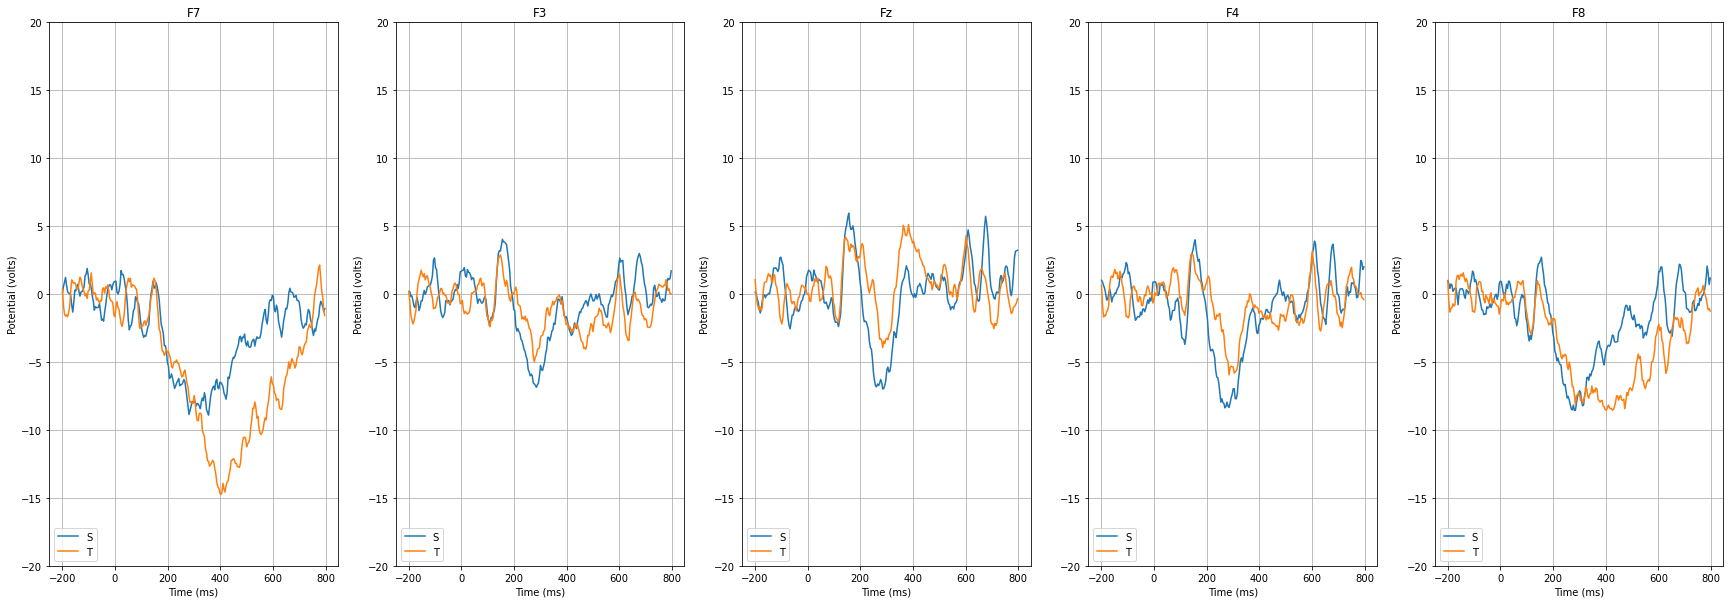

In [18]:
chans = [2,1,15,16,17] # I manually looked up the channel numbers. I made a 1 x 4  lay out for fun.  
fig,a = plt.subplots(1,5, figsize = (30,10))
labels = ['S','T']
for j in range(5):
    a[j].plot(eeg_time,erp_standard[chans[j],:])
    a[j].plot(eeg_time,erp_target[chans[j],:])
    a[j].set_ylim((-20,20))
    a[j].set_title(channelnames[chans[j]])
    a[j].legend(labels,loc='lower left')
    a[j].grid(True)
    a[j].set_xlabel('Time (ms)')
    a[j].set_ylabel('Potential (volts)')

## Problem #2: 

#### Create 5 separate ERP averages for each letter using only the standards (dont include the targets).  Also make an average for just all the targets together irrespective of letter identity as in problem 1. 

#### Investigate the channels O1, O2, PO7, PO8 to examine if the deflection of the signal around 170 ms shows any difference for different letter identities (5 cases) or for the target (1 case). 

#### Make a plot of each channel with all 6 waveforms (4 plots in total each with 6 waveforms).  

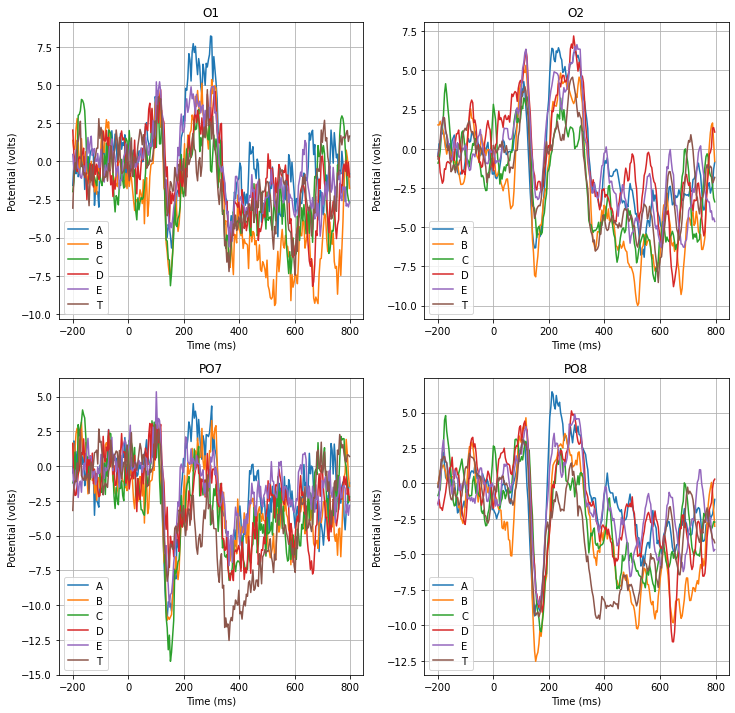

In [22]:
erp = dict()  #I made an empty dictionary.  Could have been a list too.  
for j in range(1,6,1): #made a loop over the 5 letters
    erp[j] = np.mean(eeg[(goodtrials == 1) & (stimulus == j) & (blocktarget == 0),:,:],axis =0)
erp[6] = np.mean(eeg[(goodtrials == 1)&(blocktarget > 0),:,:],axis =0) #made an average for the targets 
labels = ['A','B','C','D','E','T'] #list of labels for each condition 
chans = [[10,27],[8,25]] # I manually looked up the channel numbers. I made a 2 x 2 lay out for fun.  
fig,a = plt.subplots(2,2, figsize = (12,12))  
for j in range(1,7,1):
    a[0][0].plot(eeg_time,erp[j][chans[0][0],:])
    a[0][1].plot(eeg_time,erp[j][chans[0][1],:])
    a[1][0].plot(eeg_time,erp[j][chans[1][0],:])
    a[1][1].plot(eeg_time,erp[j][chans[1][1],:])

for j in range(2):
    for k in range(2):
        a[j][k].set_title(channelnames[chans[j][k]])
        a[j][k].legend(labels,loc='lower left')
        a[j][k].grid(True)
        a[j][k].set_xlabel('Time (ms)')
        a[j][k].set_ylabel('Potential (volts)')
plt.show()